# **Mid-Term Summative Assessment — Data Science Fundamentals**

- **Duration:** approx 1-3 hours per exercise (5-15 hours of work)
- **Format:** Individual coursework, submitted via Cortex and GitHub
- **Weight:** 30% of module grade
- **Dataset:** `attendance_anonymised.csv`

---

### 🎯 **Learning Outcomes**

By completing this assessment, you will demonstrate your ability to:

* Manage a Python data-science project using Git and GitHub.
* Import, clean, and transform a real-world dataset using `pandas`.
* Visualise data using `matplotlib`/`seaborn`.
* Build and run a simple interactive app with `pyShiny`.
* Perform and interpret a basic statistical analysis (correlation or regression).

### **💡 Tips**

* Always work from an **active virtual environment**.
* Keep your notebook clean and readable.
* Commit after each week’s exercise (recommended but not marked)
* Use `requirements.txt` to ensure reproducibility.

## 📘 Instructions

### **Exercise 1 — Project Setup (Version Control & Environment)**


1. Go to github.com and create a **new empty GitHub repository** on your Github account (no README, .gitignore, or license). 
   > *!Ensure the repo is public.*
2. Copy the repository URL and paste it below

   https://github.com/shayeliza/datascience_mid_term_sum.git



3. In your terminal, navigate to a local folder and run `git clone`:

   ```bash
   cd ./datascience2025/ 
   git clone <your_repo_url>
   ```
   > Tips: 
   > 1. Replace `./datascience2025/` with a local path of your choice
   > 2. replace <your_repo_url> with the url you copied from Github, e.g. https://github.com/user/repo-url. 
   
   This command will download the remote Github repo to the local path. It will create a folder on your machine (e.g. `./datascience2025/<assessment_project_repo>/`) linked to the remote folder on Github.
4. Inside this folder, create:

   * `requirements.txt` — include all packages needed for the project (you may copy the one used in class).
   * `README.md` — write exactly:

     ```
     Hello world! I love summative assessments.
     ```
5. Stage and commit both files:

   ```bash
   git add .
   git commit -m "Initial commit with requirements and readme. I really love summatives."
   git push
   ```
   > If you prefer using the VS Code user interface to push your commit, please feel free. 

✅ **Checkpoint:** Refresh your repository on GitHub. It should show both files.



### **Exercise 2 — Data Cleaning & Exploration**



1. Load `attendance_anonymised.csv` using `pandas`.



In [1]:
# your code here
import pandas as pd
df = pd.read_csv("attendance_anonymised.csv")
df.head(5)


,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,2025-04-29,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,2025-03-22,N,0,0,A


### First I need to understand the dataset  - what each row and column is representing
- each row is a register entry. This dataset is a bit like a bunch of registers compiled together. Thats why each student is recorded multiple times -the rows represent a student in a specific class on a specific date. So we will think of this dataset as a load of registers put together. 
- it would be useful to check that there are no duplicates in this register. i.e. same name, same class, same attendance status. 
- I feel like its safe to assume that person code = student ID. Other 'translations' for column names appear below provided by niccolo. Moving on! 

In [2]:
# checking for duplicate rows before we proceed. 
df.duplicated().any()


np.False_

Nope! No duplicates thats fab. what a clean dataset.

2. Describe the dataset using inbuilt functions such as `.head()`, `.info()`, `.describe()`.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Person Code             17053 non-null  int64 
 1   Unit Instance Code      17053 non-null  int64 
 2   Calocc Code             17053 non-null  int64 
 3   Surname                 17053 non-null  object
 4   Forename                17053 non-null  object
 5   Long Description        17053 non-null  object
 6   Register Event ID       17053 non-null  int64 
 7   Object ID               17053 non-null  int64 
 8   Register Event Slot ID  17053 non-null  int64 
 9   Planned Start Date      17053 non-null  object
 10  Planned End Date        17053 non-null  object
 11  is Positive             17038 non-null  object
 12  Postive Marks           17053 non-null  int64 
 13  Negative Marks          17053 non-null  int64 
 14  Usage Code              17038 non-null  object
dtypes:

# What I can see:
- this is a pandas Dataframe 
- we have 14 different columns to investigate! with a mix of integers, objects and datetimes. 
- the non-null count tells us how many non-missing values there are for each column header. 
- there are 10753 rows/ register entries here. column has 10753 values except for "has attended" and "attendance code" which appear to be missing the same number of values. 
- We will investigate the "has attended" column against the "attendance code" column first. we may consider comparing "has attended" with "attended" because at first glance they appear to represent the same variable (whether or not a student has attended that class) in two different dattype values. One N/Y and one 1 or 0. Binary integers may be more useful to keep. 

In [4]:
# Check what columns are actually in your dataframe
print("Available columns:")
print(df.columns.tolist())

Available columns:
['Person Code', 'Unit Instance Code', 'Calocc Code', 'Surname', 'Forename', 'Long Description', 'Register Event ID', 'Object ID', 'Register Event Slot ID', 'Planned Start Date', 'Planned End Date', 'is Positive', 'Postive Marks', 'Negative Marks', 'Usage Code']


In [5]:
comparisons = df[['is Positive', 'Postive Marks', 'Negative Marks']]
comparisons.head(20)

,is Positive,Postive Marks,Negative Marks
0,Y,1,1
1,N,0,0
2,N,0,0
3,N,0,0
4,N,0,0
5,N,0,0
6,N,0,0
7,Y,1,1
8,N,0,0
9,N,0,0


In [6]:
comparisons['is Positive'].isna().any()


np.True_

that means we have a NaN value in the Has attended column. 

In [7]:
comparisons['Postive Marks'].isna().any()


np.False_

well we can just fill in the blanks then! I would go ahead and just delete the 'has attended' column since 'attended' shows us the same thing in a different dtype but since I don't know what we'll be using the data for later I may as well just fill in the blanks and keep the column. We'll do that first, then we will investigate the 'attendance code column' because it looks like it has more than 2 values. Presumeably, late codes? Not sure. We'll come back to this. 

In [8]:
df[df['is Positive'].isna()]

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
1533,188,1772,2024,Nair,Rosa,Japanese,226,580,632,2024-04-22,2023-06-27,NaN,0,1,NaN
1728,188,1772,2025,Nair,Rosa,Japanese,160,580,244,2025-04-23,2024-11-29,NaN,0,1,NaN
1730,236,1772,2025,Thomas,Betty,Japanese,160,212,244,2025-04-23,2024-11-29,NaN,0,1,NaN
4771,198,1772,2025,Johnson,Arjun,Japanese,160,640,244,2025-04-23,2024-11-29,NaN,0,1,NaN
8804,7,1772,2024,Becker,Chen,Japanese,226,522,632,2024-04-22,2023-06-27,NaN,0,1,NaN
8896,455,1772,2025,Rodriguez,Sarah,Japanese,160,7,244,2025-04-23,2024-11-29,NaN,0,1,NaN
8901,28,1772,2025,Ben-Khalil,Kojo,Japanese,160,974,244,2025-04-23,2024-11-29,NaN,0,1,NaN
10883,269,1772,2024,Ramirez,Chiedza,Japanese,226,664,632,2024-04-22,2023-06-27,NaN,0,1,NaN
10972,14,1772,2025,Yang,Luis,Japanese,160,931,244,2025-04-23,2024-11-29,NaN,0,1,NaN
10973,297,1772,2025,Verma,Jessica,Japanese,160,698,244,2025-04-23,2024-11-29,NaN,0,1,NaN


# This is interesting...
- All students here are taking japanese. 
- You'd assume that the teacher for this class just wasn't recording attendance maybe? 
We can fill out the NaN values in the 'Has Attended' column but we won't be able to do anything to the attendance code column since we don't know what the unique values mean yet. 
- Let's start by filling in these NaN 'has atended columns' 

In [9]:
# Where 'Has Attended' is NaN and 'Attended' is 0, set to 'N'
df.loc[(df['is Positive'].isna()) & (df['Postive Marks'] == 0), 'is Positive'] = 'N'

# Where 'Has Attended' is NaN and 'Attended' is 1, set to 'Y'
df.loc[(df['is Positive'].isna()) & (df['Postive Marks'] == 1), 'is Positive'] = 'Y'

In [10]:
df['is Positive'].isna().any()

np.False_

In [11]:
df.describe()

,Person Code,Unit Instance Code,Calocc Code,Register Event ID,Object ID,Register Event Slot ID,Postive Marks,Negative Marks
count,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000
mean,258.244473,1252.674016,2023.913212,495.752536,504.818742,572.408139,0.716531,0.732892
std,146.904888,530.609058,0.774686,292.031166,275.174454,313.946746,0.450695,0.442462
min,1.000000,4.000000,2023.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,146.000000,840.000000,2023.000000,223.000000,267.000000,297.000000,0.000000,0.000000
50%,265.000000,1306.000000,2024.000000,515.000000,504.000000,574.000000,1.000000,1.000000
75%,384.000000,1749.000000,2025.000000,788.000000,733.000000,839.000000,1.000000,1.000000
max,498.000000,1945.000000,2025.000000,984.000000,984.000000,1124.000000,1.000000,1.000000


describe definitely doesn't tell us as much as .info() did for the variables we're working with. e.g. it is not necessary for us to know the interquartile ranges for module codes - at least I don't think that will be useful.

3. Drop the `Planned End Date` column.


In [12]:
df

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,2025-04-29,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,2025-03-22,N,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,2024-06-13,N,0,0,A
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,2024-06-13,Y,1,1,P
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,2023-03-04,N,0,0,A
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,2025-06-24,Y,1,1,P


In [13]:
# your code here
df = df.drop(columns = 'Planned End Date', axis=1)

^ if there is an error when you run the cell above it's because the cell has already been run so it cant find the column name because its already been dropped. nothing to worry about!

In [14]:
df

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,N,0,0,A
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,Y,1,1,P
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,N,0,0,A
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,Y,1,1,P


In [15]:
print(df['is Positive'].isna().any())
print(df['Postive Marks'].isna().any())
print(df['Negative Marks'].isna().any())
print(df['Usage Code'].isna().any())

False
False
False
True


Okay so now we just need to check our attendance code column. apparently there are NaN values here. I also think there are more than 2 values so I'll be interested to know what these represent. 

In [16]:

df['Usage Code'].unique()

array(['O', 'A', 'Y', 'P', 'L', 'Z', 'W', nan], dtype=object)

Woah this includes way more than 2 values!
Since we have no idea what these mean, it would make sense for us to just drop the column altogether. But - Niccolo might explain these later in the notebook so for now I'll just leave it as is. there is no way of us filling in the NaN values either since they don't clearly correspond with another attendance column. Moving on!

4. Rename the columns exactly as follows:

   | Old                    | New             |
   | ---------------------- | --------------- |
   | Person Code            | Person Code     |
   | Unit Instance Code     | Module Code     |
   | Calocc Code            | Year            |
   | Surname                | Surname         |
   | Forename               | Forename        |
   | Long Description       | Module Name     |
   | Register Event ID      | Event ID        |
   | Object ID              | Object ID       |
   | Register Event Slot ID | Event Slot ID   |
   | Planned Start Date     | Date            |
   | is Positive            | Has Attended    |
   | Postive Marks          | Attended        |
   | Negative Marks         | NotAttended     |
   | Usage Code             | Attendance Code |



In [17]:
# your code here
df.rename(columns={
    "Person Code": "Person Code", 
    "Unit Instance Code": "Module Code",
    "Calocc Code": "year",
    "Surname": "Surname",
    "Forename" : "Forename",
    "Long Description": "Module Name",
    "Register Event ID": "Event ID",
    "Object ID": "Object ID",
    "Register Event Slot ID": "Event Slot ID",
    "Planned Start Date": "Date", 
    "is Positive": "Has Attended",
    "Postive Marks": "Attended",
    "Negative Marks": "NotAttended",
    "Usage Code": "Attendance Code"
}, inplace = True) # Added this because its changing the original dataframe 
df.columns 

Index(['Person Code', 'Module Code', 'year', 'Surname', 'Forename',
       'Module Name', 'Event ID', 'Object ID', 'Event Slot ID', 'Date',
       'Has Attended', 'Attended', 'NotAttended', 'Attendance Code'],
      dtype='object')

5. Convert `Date` to a pandas timestamp. 
   > tip: use `pd.to_datetime()`

In [18]:
df['Date'].dtype

dtype('O')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Person Code      17053 non-null  int64 
 1   Module Code      17053 non-null  int64 
 2   year             17053 non-null  int64 
 3   Surname          17053 non-null  object
 4   Forename         17053 non-null  object
 5   Module Name      17053 non-null  object
 6   Event ID         17053 non-null  int64 
 7   Object ID        17053 non-null  int64 
 8   Event Slot ID    17053 non-null  int64 
 9   Date             17053 non-null  object
 10  Has Attended     17053 non-null  object
 11  Attended         17053 non-null  int64 
 12  NotAttended      17053 non-null  int64 
 13  Attendance Code  17038 non-null  object
dtypes: int64(8), object(6)
memory usage: 1.8+ MB


This dtype is 'O' for object. The pandas documentation says that pandas.Timestamp: "Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases". 
I will deomntsrate chaning this data type below.

In [20]:
# your code here
df['Date'] = pd.to_datetime(df['Date'])


In [21]:
df['Date'].dtype

dtype('<M8[ns]')

6. Filter the DataFrame on **one specific module** (your choice) and plot its **attendance rate over time**
   (x = Date, y = the module's average attendance).



In [22]:
# start by counting how many of each value is in the column module name
df['Module Name'].value_counts() 

Module Name
Algorithms                1140
Cloud Computing            940
Project Management         870
Quality Assurance          825
Linguistics                780
Arabic                     662
Journalism                 617
History                    600
Pharmacy                   600
System Administration      600
Public Speaking            580
International Business     551
Graphic Design             488
Geography                  448
Music Theory               442
Database Design            420
Theater                    420
French                     390
Chemistry                  360
Ethics                     354
Cybersecurity              326
Biology                    320
Medicine                   316
Leadership                 280
Statistics                 280
Arts & Crafts              266
User Experience Design     240
Digital Systems            228
Japanese                   226
Demographics               210
Nutrition                  200
Data Science               

next im going into the dataframe and filtering rows based on my 'history' condition. I am making a new dataframe called history which contains only rows where the module == history using a boolean filter system. 

In [23]:

History_df = df[df['Module Name'] == 'History'].copy() # im only making a copy here because when I try modify this slice later, i will get an error because pandas is being cautious. 
History_df.head(15)


,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A
5,280,1266,2025,Lim,Michael,History,295,726,735,2025-08-02,N,0,0,A
6,280,1266,2023,Lim,Michael,History,295,726,271,2023-07-02,N,0,0,A
11,384,1266,2023,Clark,Ruth,History,295,295,715,2023-11-11,Y,1,1,P
18,416,1266,2023,Rossi,Daniel,History,846,658,812,2023-01-08,N,0,0,A
23,346,1266,2023,Reddy,Hana,History,846,880,311,2023-06-04,Y,1,1,P
24,346,1266,2023,Reddy,Hana,History,846,880,917,2023-01-20,N,0,0,A
25,346,1266,2023,Reddy,Hana,History,295,880,715,2023-11-11,N,0,0,A


In [24]:
History_df.shape
# this is how we can check the correct number of rows has been copied over

(600, 14)

now I need to do attendance rate over time = (attendance rate / time)

In [25]:

date_grouped = History_df.groupby('Date') # using groupby to pull together intsances of classes. in other words, group all students who went to class on X date.
# (and do for all class dates)
attendance_ot = date_grouped['Attended'].mean() # now make a new series showing the mean avg attendance rate per class 
attendance_ot


Date
2023-01-08    0.533333
2023-01-20    0.500000
2023-06-04    0.500000
2023-06-29    0.500000
2023-07-02    0.400000
2023-07-20    0.733333
2023-11-11    0.600000
2023-11-12    0.566667
2023-12-27    0.366667
2024-01-23    0.400000
2024-04-30    0.433333
2024-06-21    0.733333
2024-07-03    0.566667
2024-07-31    0.500000
2024-10-09    0.400000
2025-01-31    0.700000
2025-03-02    1.000000
2025-06-11    0.500000
2025-07-03    0.600000
2025-08-02    0.533333
Name: Attended, dtype: float64

In [26]:
attendance = attendance_ot.to_frame(name='avg_attendance')
attendance


,avg_attendance
Date,
2023-01-08,0.533333
2023-01-20,0.500000
2023-06-04,0.500000
2023-06-29,0.500000
2023-07-02,0.400000
2023-07-20,0.733333
2023-11-11,0.600000
2023-11-12,0.566667
2023-12-27,0.366667


now we can plot this over time. When working with time, something like a line plot would make sense. Usually id say a histogram but we aren't interested in the distibution of attendance rates.

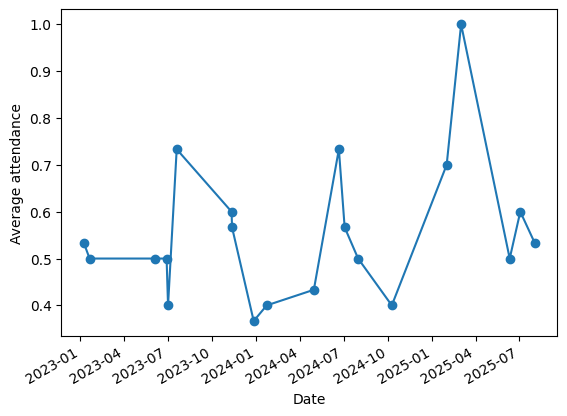

In [27]:
import matplotlib.pyplot as plt
attendance['avg_attendance'].plot(marker = 'o')
plt.xlabel('Date')
plt.ylabel('Average attendance')
plt.show()

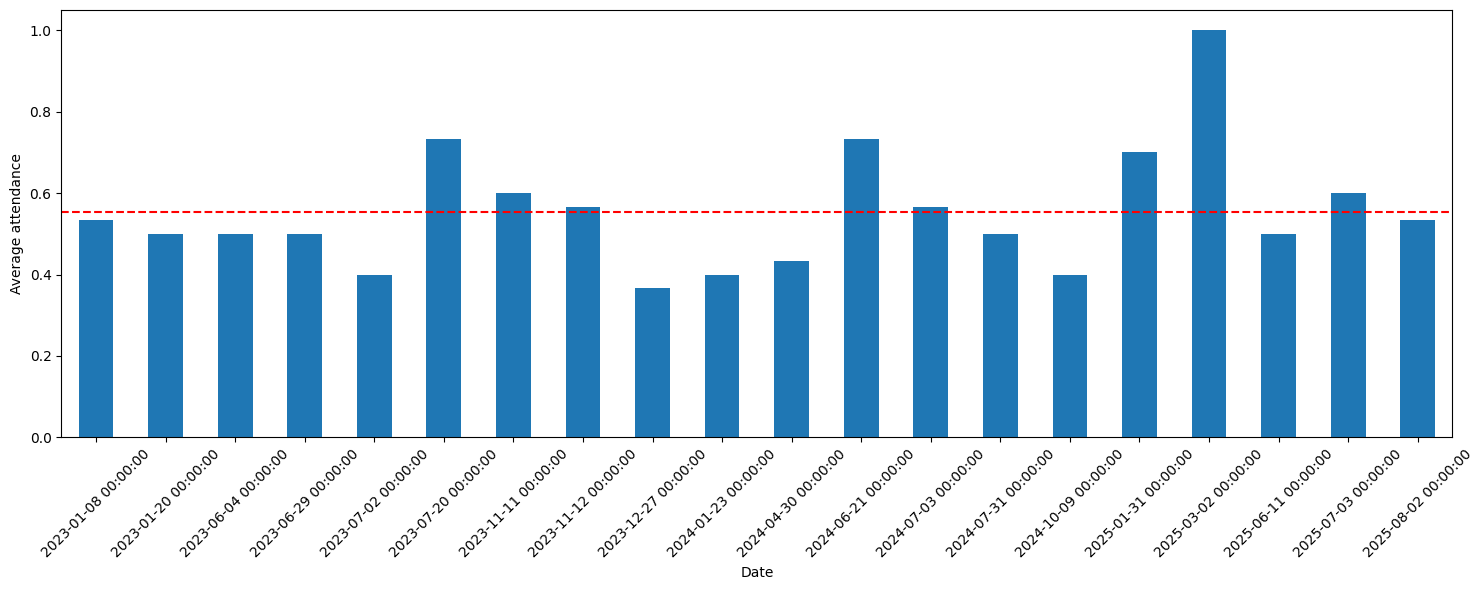

In [28]:
attendance['avg_attendance'].plot(kind='bar', figsize=(15, 6))
plt.axhline(y=attendance['avg_attendance'].mean(), color='red', linestyle='--', label=f'Mean: {attendance["avg_attendance"].mean():.3f}')
plt.xlabel('Date')
plt.ylabel('Average attendance')
plt.xticks(rotation=45)
plt.tight_layout()  # doing this to prevent labels from getting cut iff
plt.show()

### What can I see?
- looks like 100% of history students attended a class on the 31st Jan 2025! 
- I have plotted the red line along the mean average attendance for all classes which shows to be about 58% attendance 


7. **[For L6 students only]** Add a column, titled "Student Overall Attendance", with the average attendance for the student. Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance".

Creating 'student overall attendance' column first:

In [29]:
# plan:
# create column called "full name" which merges the forename and the surname 
df['full_name']=df['Forename'] +' ' + df['Surname']
df

,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,full_name
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,Ursula Lewis
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,Ursula Lewis
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,Michael Lim
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,Michael Lim
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,Michael Lim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,N,0,0,A,Kojo Ben-Khalil
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,Y,1,1,P,Tariq Becker
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,N,0,0,A,Thomas Kumar
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,Y,1,1,P,Charles Durand


In [30]:
# then groupby the full name 
individuals = df.groupby('full_name')

# then make a for loop where for each student, calculate the mean avg attendance and append it to column "student overall attendance"
for name, group in individuals:  #for each student in the dataframe 
    #calculate the mean avg attendance
    student_avg = group['Attended'].mean()
    #add this average to all rows for this student 
    df.loc[group.index, 'student_overall_attendance'] = student_avg 


In [31]:
print (df.columns)

Index(['Person Code', 'Module Code', 'year', 'Surname', 'Forename',
       'Module Name', 'Event ID', 'Object ID', 'Event Slot ID', 'Date',
       'Has Attended', 'Attended', 'NotAttended', 'Attendance Code',
       'full_name', 'student_overall_attendance'],
      dtype='object')


In [32]:
# then print a test dataframe by filtering the dataframe by one random student name and seeing if all values in new column are the same
Checking_df = df[df['full_name'] == 'Ursula Lewis'].copy()
Checking_df

,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,full_name,student_overall_attendance
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,Ursula Lewis,0.875
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,Ursula Lewis,0.875
1512,129,1247,2023,Lewis,Ursula,Data Science,414,37,1034,2023-01-24,Y,1,1,P,Ursula Lewis,0.875
1514,129,123,2023,Lewis,Ursula,Creative Writing,797,37,739,2023-11-07,Y,1,1,P,Ursula Lewis,0.875
1607,129,1787,2024,Lewis,Ursula,Geography,576,37,797,2024-05-26,Y,1,1,O,Ursula Lewis,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16191,129,278,2025,Lewis,Ursula,Nursing,37,37,671,2025-04-24,Y,1,1,O,Ursula Lewis,0.875
16388,129,1764,2025,Lewis,Ursula,Music Theory,897,37,664,2025-05-14,Y,1,1,O,Ursula Lewis,0.875
16391,129,1764,2023,Lewis,Ursula,Music Theory,897,37,1085,2023-07-31,Y,1,1,O,Ursula Lewis,0.875
16923,129,1787,2024,Lewis,Ursula,Geography,576,37,314,2024-02-13,Y,1,1,O,Ursula Lewis,0.875


In [33]:
df.head()

,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,full_name,student_overall_attendance
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,Ursula Lewis,0.875000
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,Ursula Lewis,0.875000
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,Michael Lim,0.216216
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,Michael Lim,0.216216
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,Michael Lim,0.216216


## Next up:
"Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance"."

In [34]:
# first im going to work out the z-score of student_overall_attendance
# z score = (original value - mean of the feature)/ standard deviation of feature.
df['Standardised Student Overall Attendance'] = (df['student_overall_attendance'] - df['student_overall_attendance'].mean()) / df['student_overall_attendance'].std()

In [35]:
df

,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,full_name,student_overall_attendance,Standardised Student Overall Attendance
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,Ursula Lewis,0.875000,0.777499
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,Ursula Lewis,0.875000,0.777499
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,Michael Lim,0.216216,-2.454698
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,Michael Lim,0.216216,-2.454698
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,Michael Lim,0.216216,-2.454698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,N,0,0,A,Kojo Ben-Khalil,0.460317,-1.257062
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,Y,1,1,P,Tariq Becker,0.973118,1.258897
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,N,0,0,A,Thomas Kumar,0.776596,0.294697
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,Y,1,1,P,Charles Durand,0.978610,1.285840


✅ **Checkpoint:** Cleaned DataFrame and a line or bar plot of attendance over time for one module.

---



### **Exercise 3 — Make it Shiny**


In [36]:
df.to_csv('shiny_dataframe.csv', index = False)


1. Create a file called `app.py`.
2. Build a minimal Shiny app that only displays the plot you created in the previous exercise.
3. Run the app locally using this terminal command:

   ```bash
   shiny run --reload --launch-browser app.py
   ```
   > if your terminal is not in the same folder where the `app.py` file is, you will need to specify the correct path, e.g. `shiny run --reload --launch-browser /path/to/my/app.py`

4. **[For L6 students only]** Enhance the app with a title and at least one more UI element. E.g., you could enhance the app with interactivity (e.g. allow the user to select the module to plot).

✅ **Checkpoint:** The app runs without errors and displays the plot from Exercise 2 in a browser.

---

### **Exercise 4 — Comparing Modules**



1. Compute the **mean** and **standard deviation** of attendance per module using pandas `groupby`. Consult the documentation if needed.


first I need to work out the attendance per module

In [37]:
#PLAN
#use groupby to group modules rather than names this time 
modules_grouped = df.groupby('Module Name')

# then make a for loop where for each module, calculate the mean avg attendance and append it to column "overall module attendance avg"
for module_name, group in modules_grouped:  #for each unique module in the grouped modules 
    #calculate the mean avg attendance
    module_avg = group['Attended'].mean()
    #add this average to all rows for this module 
    df.loc[group.index, 'overall module attendance avg'] = module_avg


In [38]:
df.head()

,Person Code,Module Code,year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,full_name,student_overall_attendance,Standardised Student Overall Attendance,overall module attendance avg
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,Ursula Lewis,0.875000,0.777499,0.993333
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,Ursula Lewis,0.875000,0.777499,0.622517
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,Michael Lim,0.216216,-2.454698,0.553333


In [39]:
# next I need to compute the mean attendance per module 
# since I have already worked out the mean overall module attendance avg and put it in a column, 
# I could just print the first value from each group so that we can visualise it
mapm = df.groupby('Module Name')['overall module attendance avg'].first()
mapm # mapm - mean average per module

Module Name
Algorithms                0.744737
Arabic                    0.752266
Arts & Crafts             0.605263
Biology                   0.618750
Biomedical Engineering    0.650000
Business Intelligence     0.782051
Chemistry                 0.675000
Cloud Computing           0.840426
Creative Writing          0.967105
Cybersecurity             0.957055
Data Analysis             0.466667
Data Science              0.942105
Database Design           0.645238
Demographics              0.885714
Digital Systems           0.622807
Discrete Mathematics      0.776786
English Literature        0.975000
Epidemiology              1.000000
Ethics                    0.759887
French                    0.928205
Geography                 0.868304
Graphic Design            0.065574
History                   0.553333
Information Technology    0.842857
International Business    0.669691
Italian                   0.622517
Japanese                  0.663717
Journalism                0.807131
Leadersh

Next up: standard deviation

In [40]:
stdpm = df.groupby('Module Name')['Attended'].std()
stdpm # mean attendance per module

Module Name
Algorithms                0.436200
Arabic                    0.432023
Arts & Crafts             0.489715
Biology                   0.486454
Biomedical Engineering    0.483046
Business Intelligence     0.415525
Chemistry                 0.469027
Cloud Computing           0.366406
Creative Writing          0.178951
Cybersecurity             0.203044
Data Analysis             0.504525
Data Science              0.234161
Database Design           0.479012
Demographics              0.318918
Digital Systems           0.485750
Discrete Mathematics      0.418272
English Literature        0.156615
Epidemiology              0.000000
Ethics                    0.427757
French                    0.258480
Geography                 0.338538
Graphic Design            0.247790
History                   0.497562
Information Technology    0.366563
International Business    0.470752
Italian                   0.486371
Japanese                  0.473486
Journalism                0.394871
Leadersh

2. Create a `seaborn.barplot` of mean attendance per module with 95% confidence intervals.


In [ ]:
stdpm_df = stdpm.sort_values().to_frame() # im sorting them from lowest to highest so that when I plot, the trend is much easier to interpret. 
stdpm_df

,Attended
Module Name,
Epidemiology,0.000000
Nursing,0.081650
English Literature,0.156615
Creative Writing,0.178951
Religious Studies,0.200664
Cybersecurity,0.203044
Data Science,0.234161
Graphic Design,0.247790
French,0.258480


C:\Users\shayb\AppData\Local\Temp\ipykernel_9304\522253739.py:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.2}` instead.

  sns.barplot(data = stdpm_df, x='Module Name', y= 'Attended', errorbar = 'ci', capsize=0.5, errwidth= 0.2)


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

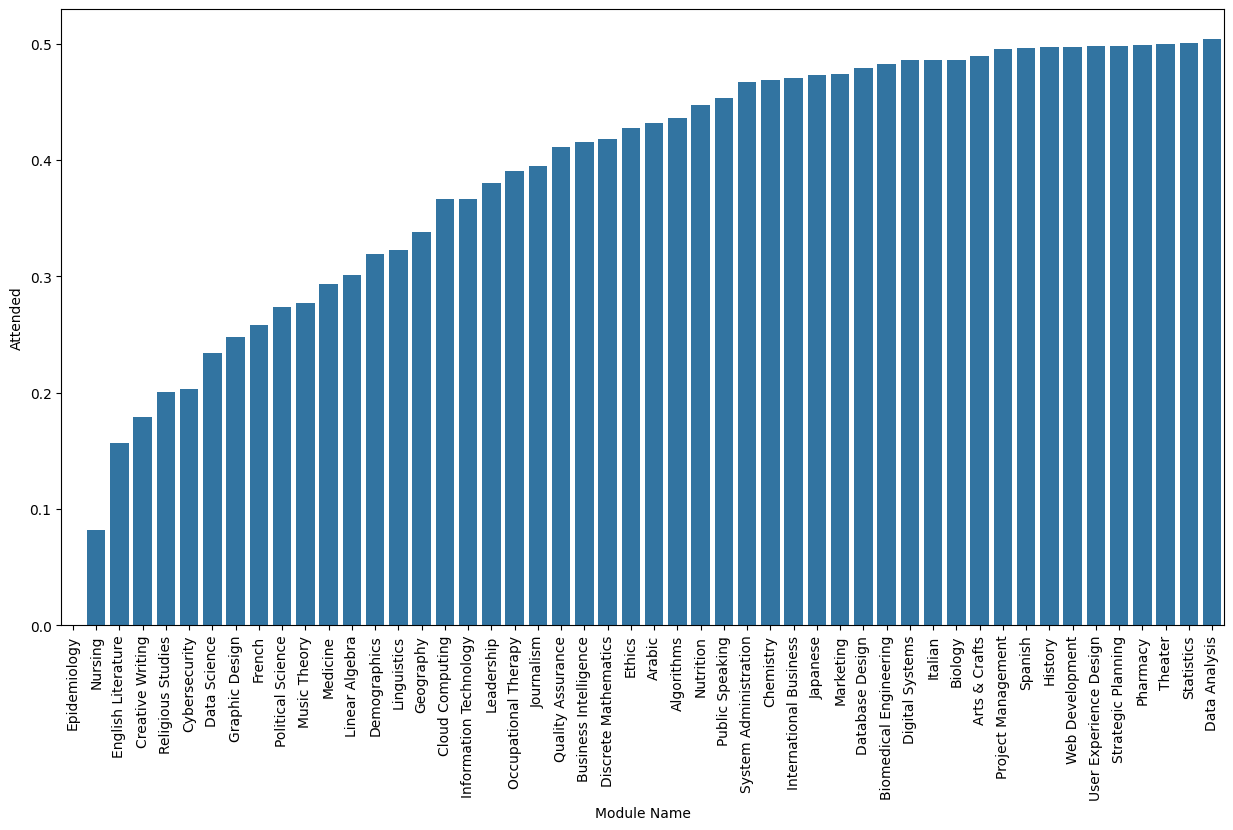

In [42]:
# your code here
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.barplot(data = stdpm_df, x='Module Name', y= 'Attended', errorbar = 'ci', capsize=0.5, errwidth= 0.2)
plt.xticks(rotation = 90)
plt.tight_layout


3. Write a short interpretation (2–3 sentences) explaining what the plot and error bars show.

    [Double click on this cell to edit and type your answer]

✅ **Checkpoint:** My notebook and/or my Shiny app show a barplot with error bars, one bar per module (x-axis), where the height of the bar is the module's attendance rate (y-axis).

---



### **Exercise 5 — Attendance Relationships**



1. Answer the question: **Do students with low overall attendance tend to attend modules that have low attendance?**.

2. **[For L5 students only]**. Choose between a correlation analysis or a linear regression analysis to answer the question.

3. **[For L6 students only]** Run both correlation analysis and linear regression analysis to answer the same question. Do they tell the same story?

> Tips:
> 1. Compute the mean attendance rate of each module. Can you re-use some of the `groupby` code you wrote above?
> 2. For each module, compute the average overall attendance of the students who attended that module.
> 3. Correlation and linear regression can both help you answer the question. 
> 4. Report main statistic and p-value(s).


In [43]:
# your code here
...

✅ **Checkpoint:** Table or printout showing correlation or regression results.

# THE END!